# R LAB GRADED ASSIGNMENT 1
## MSc in Business Analytics<br>
Athens University of Business and Economics<br>
Module: Statistics in Business Analytics 1<br>
Assignment created by Professor Stauros Nikolakopoulos(Department of Statistics, AUEB)<br>
Author: Ferdinand Tzimas


The data to be used for this assignment will be scraped from https://www.metacritic.com. You will have to manipulate data from film reviews (both critics- and public-based). Critics reviews (from Washington Post) are described in the critic variable while public reviews in the metascore variable.

In [2]:
library(robotstxt)
library(rvest)

# This code scrapes 27 pages from a website about movie reviews and creates a dataframe with each row corresponding to a movie reviewed.
#After the assembly of the data in the df.tot dataframe we perform several actions based on descriptive statistics such as finding aggregate and derived data from the original data and performing data visualization in order to extract information about the movie reviews.


paths_allowed("https://www.metacritic.com/publication/washington-post?filter=movies&num_items=100&sort_options=date&page=0")

main.page <- "https://www.metacritic.com/publication/washington-post?filter=movies&num_items=100&sort_options=date&page="

for (i in 0:27){
                # at each iteration the variable step.page takes the value of main.page concatenated with the page number corresponding to that iteration so that each separate page of the website can be reached and scraped through the link fed to the variable step.page
                step.page <- paste(main.page,i,sep="") 
                webdata <-read_html(step.page) 
                #Vector title is created containing the titles of all movies of the page that corresponds to that particular iteration 
                title <-c(webdata %>% html_nodes("div.review_product") %>% html_nodes("a") %>%html_text()) 
                #Vector metascore is created which includes the metascores of all movies of the page that correspond to that particular iteration
                metascore <- c(webdata %>% html_nodes("li.review_product_score.brief_metascore") %>%html_nodes("span.metascore_w") %>% html_text()) 
                #Vector critic is created which includes the critic's scores of all movies of the page that corresponds to that particular iteration
                critic <- c(webdata %>% html_nodes("li.review_product_score.brief_critscore") %>%html_nodes("span.metascore_w") %>% html_text())
                #Vector date is created which includes the dates of the review of all movies of the page that corresponds to that particular iteration
                date <- c(webdata %>% html_nodes("li.review_action.post_date") %>% html_text())  
                if (length(date)<100 ){for (j in length(date):100){ date[j] <- date[length(date)]}}  
                #isolates into vector a the day number from the strings-values of the date vector
                a <- substr(date,12,13)
                #isolates into vector b the month from the same strings-values of the date vector
                b <- substr(date,8,10) 
                #isolates into vactor d the year from the same strings-values of the date vector
                d <- substr(date,16,19) 
                lct<- Sys.getlocale("LC_TIME"); Sys.setlocale("LC_TIME", "C") 
                #concatenates the isolated day, month and year from a,b,d in a single string separated by / for all corresponding strings of the three same size vectors
                date2 <- apply(cbind(a,b,d),1,paste,collapse="/") 
                #turns date2 vector to date type(year-month-day)
                date3 <- as.Date(date2,"%d/%b/%Y") 
                Sys.setlocale("LC_TIME", lct) #OK
                #creates a dataframe containing the titles,metascores,critic scores and dates for all movies scraped from that webpage
                df = data.frame(title,metascore,critic,date3) 
                #gives names to the dataframe columns
                colnames(df) <- c("title", "metascore", "critic","date") 
                #sets metascore column values at first as character type then as numeric
                df$metascore <- as.numeric(as.character(df$metascore)) 
                #sets critic column values at first as character type then as numeric
                df$critic <- as.numeric(as.character(df$critic)) 
                #keeps only the rows that have no missing values
                df <- df[complete.cases(df), ] 
                if (i==0){ #OK
                   df.tot <- df} 
                #for every iteration after the first... 
                if (i>0){ #?
                  #the dataframe created, having all movies for that webpage, is merged by row with all other dataframes that were created and assigned to the variable df in all previous iterations.
                   df.tot <- rbind(df.tot,df) } 
}
#Ensures that the values of the title column of df.tot are in character form.
df.tot$title <-as.character(df.tot$title)   

 www.metacritic.com                      





[1] TRUE

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(e

Provide a short description of the data

In [3]:
str(df.tot)

'data.frame':	2775 obs. of  4 variables:
 $ title    : chr  "The Souvenir: Part II" "Clifford the Big Red Dog" "Eternals" "Spencer" ...
 $ metascore: num  89 56 52 77 83 57 65 62 75 74 ...
 $ critic   : num  63 50 50 75 63 75 63 37 63 50 ...
 $ date     : Date, format: "2021-11-09" "2021-11-09" ...


Create three new variables that are directly included in the data frame (assign them directly as
variables of the df.tot data frame).These variables should describe:

 The ratio of public score / critics score for each movie (ratio)
 The percentile of each metascore value (perc.meta) 
 The percentile of each critic value (perc.critic)
 The year each film was reviewed (year)

In [4]:
df.tot$ratio=df.tot$metascore/df.tot$critic
df.tot$perc.meta=round((rank(df.tot$metascore)/length(df.tot$metascore)),digits=2)
df.tot$perc.critic=round((rank(df.tot$critic)/length(df.tot$critic)),digits=2)
df.tot$year <- as.numeric(format(df.tot$date, "%Y"))

Which film has the highest metascore score?

In [5]:
df.tot$title[which(df.tot$metascore==max(df.tot$metascore))]
#Huh! Its "Boyhood"...

[1] "Boyhood"

Produce a boxplot of the perc.meta variable, for (faceted by) each year observed in the dataset (in
the same plot window). Draw a vertical line at y=0.5 and discuss the result.

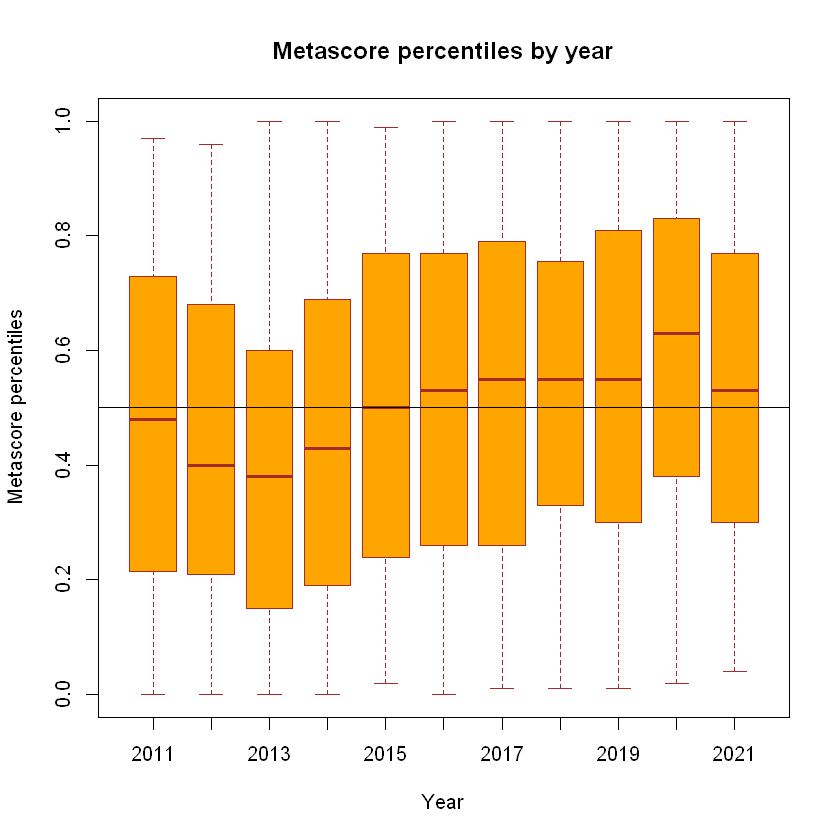

In [6]:
boxplot(df.tot$perc.meta~df.tot$year,data=df.tot,main="Metascore percentiles by year",xlab="Year",ylab="Metascore percentiles",col="orange",border="brown")
abline(a=0.5,b=0)
#WE NOTICE THAT THE MAJORITY OF VALUES AFTER 2015 ARE ABOVE THE 50 PERCENTILE OF ALL MOVIE METASCORES IN THE DATASET. BASICALLY, THEY GIVE MOVIES HIGHER SCORES AS OF LATELY.

Some of the ratio values are infinity. Explain why this is happening and create a new data frame,
named df.tot2, which does not include these observations


In [7]:
which(!is.finite(df.tot$ratio))
#Used above command to see where the problem is.
#Lets see if any critics scored zero
which(df.tot$critic==0)
#By running the two previous commands it is obvious that ratio infinity lies within the rows of the dataframe where the critics scored zeros
df.tot2<-df.tot[df.tot$critic!=0,]
#Lets check
which(!is.finite(df.tot2$ratio))

[1]  291 1261 1427 1495 1630 1760 1944 1996 2068 2396 2675

[1]  291 1261 1427 1495 1630 1760 1944 1996 2068 2396 2675

integer(0)

Work with the df.tot2 data frame. Create a matrix with two columns, one with the metascore and
one with the critic. Calculate a vector that includes the average of the two, by using the apply()
function.

In [8]:
q7matrix <- df.tot2[,c('metascore','critic')]
average<-apply(q7matrix,1,mean)
head(average,20)

2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17 
76.0 53.0 51.0 76.0 73.0 66.0 64.0 49.5 69.0 62.0 71.5 74.5 70.0 71.0 90.5 39.5 
  18   19   20   21 
78.5 93.0 72.0 71.5

Work with the df.tot2 data frame. Create a scatterplot with date on the x-axis and perc.meta on
the y-axis. Main title should be "Metascores percentiles" and the axes named accordingly. Colour
the dots according to whether the observation has a metascore>50 or not. Add a vertical dashed
line for metascore=50. Make the y-axis labels to be perpendicular to the axis.

[1] 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
[16] 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
[31] 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22

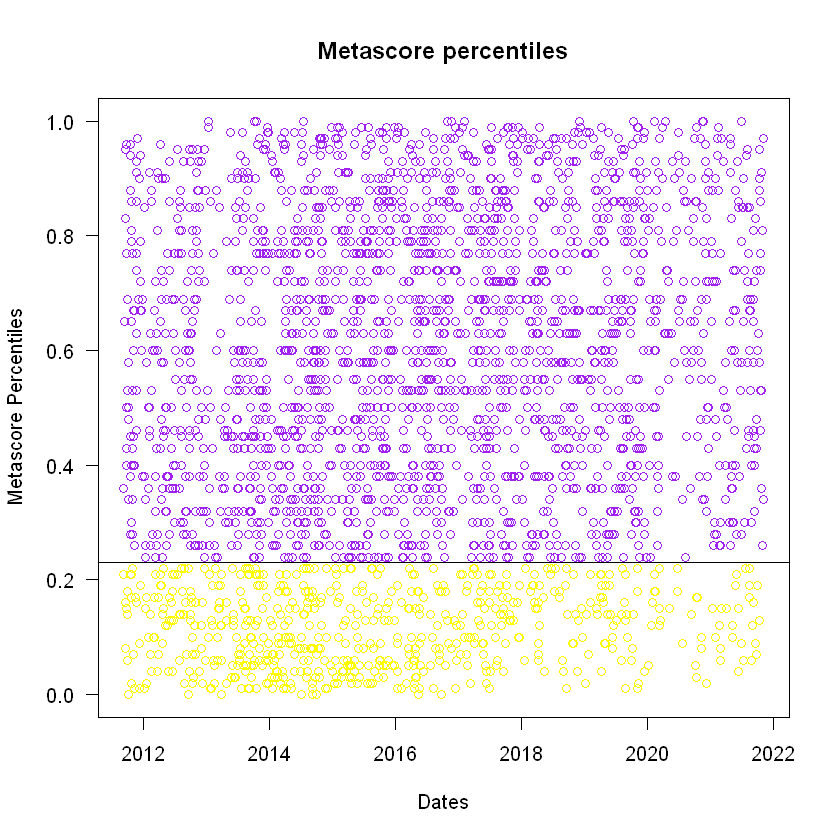

In [9]:
x <- df.tot2$date
y <- df.tot2$perc.meta
df.tot2$perc.meta[df.tot2$metascore==50]
#23 percentile corresponds to metascore equal to 50
plot(x,y,main='Metascore percentiles',xlab = 'Dates',ylab = 'Metascore Percentiles',las=1,col=ifelse(y>0.23,"purple","yellow"))
abline(a=0.23,b=0)

Comment on the above graph, taking into account the possible range of values for metascore (0-100)

In [10]:
#As we can see from the scatterplot a metascore of 50 corresponds to 23 percentile meaning that 77 percent of all movies from the dataframe received metascores over 5 out of 10.
#We also see that there more dots corresponding to metascores below 50 for the years prior to 2016. From 2016 and onward, we see more movies scoring above 50 compared to the period 2012-2015.
